## **Notebook PC#01**
## Regularized Linear Classifier for the MNIST database. Designed from scratch.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Gabriel Toffanetto França da Rocha - 289320 <br>
**Aluno(a):** Maria Fernanda Paulino Gomes - 206745 <br>


In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from keras.datasets import mnist

(Xp, y), (Xtp, yt) = mnist.load_data()
Xa = Xp.reshape(Xp.shape[0], 784)
Xta = Xtp.reshape(Xtp.shape[0], 784)

Xa = Xa / 255.0
Xta = Xta / 255.0

X0 = np.ones((Xp.shape[0],1))
X = np.hstack((X0,Xa))
Xt0 = np.ones((Xtp.shape[0],1))
Xt = np.hstack((Xt0,Xta))

print("Shape of X: ".ljust(10),  X.shape)
print("Shape of y: ".ljust(10),  y.shape)
print("Shape of Xt: ".ljust(10),  X.shape)
print("Shape of yt: ".ljust(10),  yt.shape)

11490434/11490434 [==============================] - 0s 0us/step
Shape of X:  (60000, 785)
Shape of y:  (60000,)
Shape of Xt:  (60000, 785)
Shape of yt:  (10000,)


In [ ]:
# Visualizing a random data point
import plotly.express as px

ind = np.random.randint(60000)
print('Data point: ', ind, '\n', 'Label: ', y[ind])
fig = px.imshow(255-Xp[ind], binary_string=True, width=200, height=200)
fig.update_xaxes(showticklabels=False)
fig.update_yaxes(showticklabels=False)
fig.update_layout(margin=dict(l=1, r=1, t=1, b=1))
fig.show()

Data point:  55603 
 Label:  7


In [ ]:
# Dataset balancing analysis
from tensorflow.keras.utils import to_categorical

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)
fig1 = px.bar(x=range(10),y=sum_along_columns1, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the training dataset</b>")
fig1.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig1.show()
fig2 = px.bar(x=range(10),y=sum_along_columns2, width=600, height=400,
              labels=dict(x="Class", y="Number of examples"), title="<b>Number of examples per class in the test dataset</b>")
fig2.update_layout(xaxis = dict(tickmode = 'linear', dtick = 1), title_x=0.5)
fig2.show()

[5923. 6742. 5958. 6131. 5842. 5421. 5918. 6265. 5851. 5949.]
[ 980. 1135. 1032. 1010.  982.  892.  958. 1028.  974. 1009.]


In [ ]:
partition = 0.7

# Mixing the dataset before partitioning
index = np.arange(0,X.shape[0])
np.random.shuffle(index)

training_set_size = int(X.shape[0] * partition)

index_training = index[:training_set_size]
index_validation = index[training_set_size:]


X_training = X[index_training]
y_training = yy[index_training]

X_validation = X[index_validation]
y_validation = yy[index_validation]

print("X_training:".ljust(20), X_training.shape)
print("y_training:".ljust(20), y_training.shape)

print("X_validation:".ljust(20), X_validation.shape)
print("y_validation:".ljust(20), y_validation.shape)

X_training:          (42000, 785)
y_training:          (42000, 10)
X_validation:        (18000, 785)
y_validation:        (18000, 10)


In [ ]:
def get_class_from_sample(sample: np.ndarray):
    class_ = 1
    for i in sample:
        if i == 0:
            class_ += 1
        else:
            break
    return class_

In [ ]:
def get_w(X, y, c):
    w_1 = (np.matmul(np.transpose(X), X) + c * np.eye(X.shape[1]))
    w_2 = np.matmul(np.transpose(X), y)
    w,resid,rank,s = np.linalg.lstsq(w_1, w_2, rcond=None)
    return w


In [ ]:
def get_rates_from_c_values(X, y, c_values, Ws = []):
    hit_rates = []

    if len(Ws) != 0:
        are_Ws_given = True
    else:
        are_Ws_given = False
        Ws = []

    for index, c in enumerate(c_values):
        print(c)

        if are_Ws_given:
            W = Ws[index]
        else:
            W = get_w(X, y, c)
            Ws.append(W)

        y_estimate = np.matmul(X,W)
        hits = 0
        for index, estimate in enumerate(y_estimate):
            max_index = np.where(estimate == np.amax(estimate))[0][0]
            estimated_class = max_index + 1
            if estimated_class == get_class_from_sample(y[index]):
                hits += 1
        hit_rates.append(hits/y_estimate.shape[0])
    return hit_rates, Ws

In [ ]:
c_values = [pow(2,d) for d in range(-10, 19, 2)] # Range goes up to 19 to ensure search up to 2^18

hit_rates_training, Ws = get_rates_from_c_values(X_training, y_training, c_values)

0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144


In [ ]:
hit_rates_validation, _ = get_rates_from_c_values(X_validation, y_validation, c_values, Ws)

0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144


Best c value: 256 
Performance of this value: 0.8564444444444445


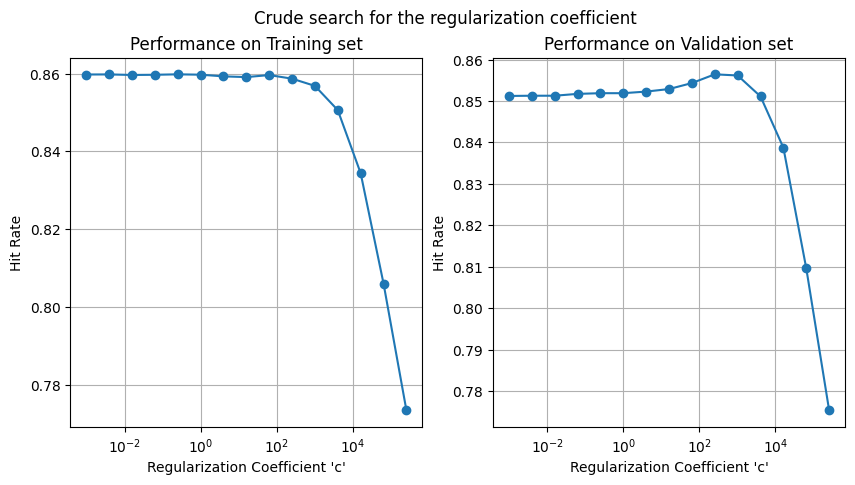

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))



<font color="green">
Atividade (a) <br>
Confira se o intervalo de excursão da busca está adequado. Justifique sua resposta. <br>
Caso não esteja, faça modificações pertinentes até encontrar um bom intervalo de busca. <br>
</font>

Resposta: O intervalo de busca do coeficiente de regularização apresenta a evolução da taxa de acurácia, que conforme o aumento do coeficiente, apresenta uma melhora, e depois uma grande piora. Dessa forma, consegue-se obter o valor para o coeficiente que apresenta um máximo local para a performance do classificador, sendo então um intervalo adequado para a busca do coeficiente de regularização.  


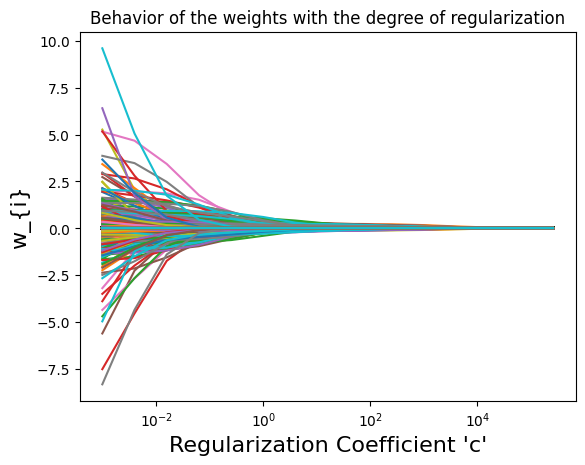

In [ ]:
lambd_values = c_values
w_values = Ws
import numpy as np
import matplotlib.pyplot as plt

def plot_regularization_path(lambd_values, w_values):
    num_coeffs = len(w_values[0])
    for i in range(num_coeffs):
        plt.plot(lambd_values, [wi[i] for wi in w_values])
    plt.xlabel(r"Regularization Coefficient 'c'", fontsize=16)
    plt.ylabel(r"w_{i}", fontsize=16)
    plt.xscale("log")
    plt.title("Behavior of the weights with the degree of regularization")
    plt.show()

plot_regularization_path(lambd_values, w_values)

In [ ]:
step =  0.1 * (4 * best_c - best_c / 4);

fine_c_values = np.arange((best_c/4), (4*best_c) + step / 10, step)

hit_rates_training_fine, Ws_fine = get_rates_from_c_values(X_training, y_training, fine_c_values)

64.0
160.0
256.0
352.0
448.0
544.0
640.0
736.0
832.0
928.0
1024.0


In [ ]:
hit_rates_validation_fine, _ = get_rates_from_c_values(X_validation, y_validation, fine_c_values, Ws_fine)

64.0
160.0
256.0
352.0
448.0
544.0
640.0
736.0
832.0
928.0
1024.0


Best c value: 256.0 
Performance of this value: 0.8564444444444445


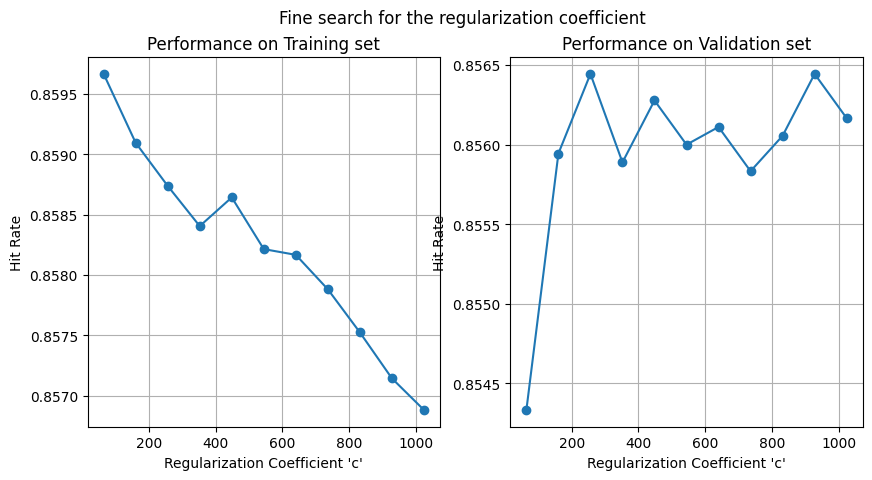

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Fine search for the regularization coefficient")
axs[0].plot(fine_c_values, hit_rates_training_fine, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].plot(fine_c_values, hit_rates_validation_fine, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation_fine == np.amax(hit_rates_validation_fine))[0][0]

best_c = fine_c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation_fine[best_c_index]))

In [ ]:
W = get_w(X, yy, best_c)
print(W.shape)

(785, 10)


In [ ]:
yt_estimate = np.matmul(Xt,W)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))

# Calculating precision of the classes - (Group)

precision = []

for i in range(10):
  TP = 0
  FP = 0
  for j in range(10):
    if(i == j):
      TP = confusion_matrix[i][j]
    else:
      FP += confusion_matrix[i][j]
  precision.append(TP/(FP+TP))

print('Precision: '+str(['('+str(i[0])+', '+str("{0:0.4f}".format(i[1]))+')' for i in enumerate(precision)]))

# Calculating recall of the classes - (Group)

recall = []

for j in range(10):
  TP = 0
  FN = 0
  for i in range(10):
    if(i == j):
      TP = confusion_matrix[i][j]
    else:
      FN += confusion_matrix[i][j]
  recall.append(TP/(FN+TP))

print('Recall   : '+str(['('+str(i[0])+', '+str("{0:0.4f}".format(i[1]))+')' for i in enumerate(recall)]))

# Calculating balanced accuracy of the classes - (Group)

BA = sum(recall)/10
print('Balanced accuracy: '+str("{0:0.4f}".format(BA)))

confusion_matrix_df = pd.DataFrame(confusion_matrix)
confusion_matrix_df

Performance on test set: 0.8624
Precision: ['(0, 0.9095)', '(1, 0.8267)', '(2, 0.9194)', '(3, 0.8438)', '(4, 0.8216)', '(5, 0.8936)', '(6, 0.8828)', '(7, 0.8577)', '(8, 0.8452)', '(9, 0.8505)']
Recall   : ['(0, 0.9643)', '(1, 0.9753)', '(2, 0.7955)', '(3, 0.8772)', '(4, 0.9002)', '(5, 0.7253)', '(6, 0.9196)', '(7, 0.8619)', '(8, 0.7793)', '(9, 0.8008)']
Balanced accuracy: 0.8599


,0,1,2,3,4,5,6,7,8,9
0,945,0,18,4,0,21,17,4,14,16
1,0,1107,59,17,22,17,10,46,50,11
2,1,2,821,22,6,4,8,15,11,3
3,1,2,23,886,0,84,0,7,32,15
4,1,3,15,5,884,23,19,24,25,77
5,7,1,0,15,3,647,16,0,35,0
6,15,5,35,10,9,24,881,1,17,1
7,2,1,18,23,1,16,0,886,14,72
8,7,14,38,17,11,39,7,0,759,6
9,1,0,5,11,46,17,0,45,17,808


In [ ]:
def f_score(confusion_matrix, betas):
    recall = confusion_matrix[range(10), range(10)]/np.sum(confusion_matrix, axis=0)
    precision = confusion_matrix[range(10), range(10)]/np.sum(confusion_matrix, axis=1)

    f_scores = np.zeros((len(betas), 10))

    for i, b in enumerate(betas):
        f_scores[i] = (1 + b**2) * precision * recall/(b**2 * precision + recall)

    return f_scores

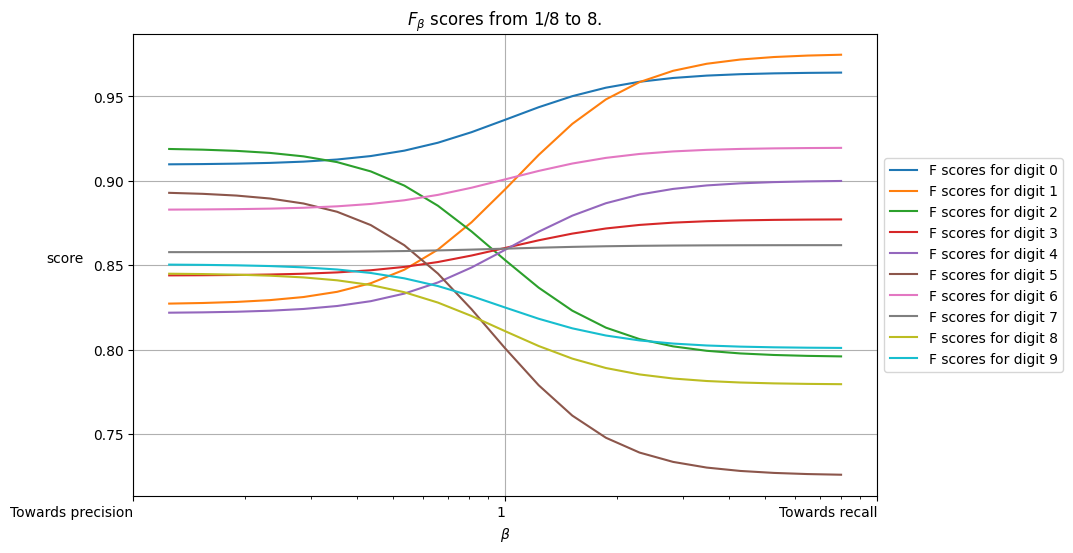

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))

for i in range(10):
    plt.plot(np.logspace(-3, 3, base=2, num=21), f_score(confusion_matrix, np.logspace(-4, 4, base=2, num=21))[:, i], label=f"F scores for digit {i}")

ax.set_xlabel("$\\beta$")
ax.set_ylabel("score", rotation=0, labelpad=20)

ax.set_xscale('log')
ax.set_xticks(np.geomspace(10**-1, 10**1 ,3), ["Towards precision", "1","Towards recall"], ha='right')
ax.grid()
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

ax.get_xaxis

# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.set_title("$F_{\\beta}$ scores from 1/8 to 8.")

plt.show()

<font color="green">
Atividade (b) <br>
Indique quais são as duas classes mais desafiadoras para o classificador e qual o critério usado por você para chegar a esta conclusão. <br>
</font>

Resposta: As classes referentes aos números 5 e 8 são as que se demonstraram mais desafiadoras. Para elas, as curvas de F-score são mais baixas, principalmente ao ponderar mais o recall, além de terem a menor quantidade de acertos na matriz de confusão. Analisando a precisão calculada a partir da matriz de confusão, esses dois possuem precisões mais elevadas, porém quanto a recall, são os dois menores. Ou seja, é facil definir se é 5 ou 8, porém eles são os que mais confundem o classificador com outros números. O 5 é grandemente confundido com o 3 e o 8 é muito confundido com o 1.


#### **Visualization of the 10 vectors of weights W, without the bias.**



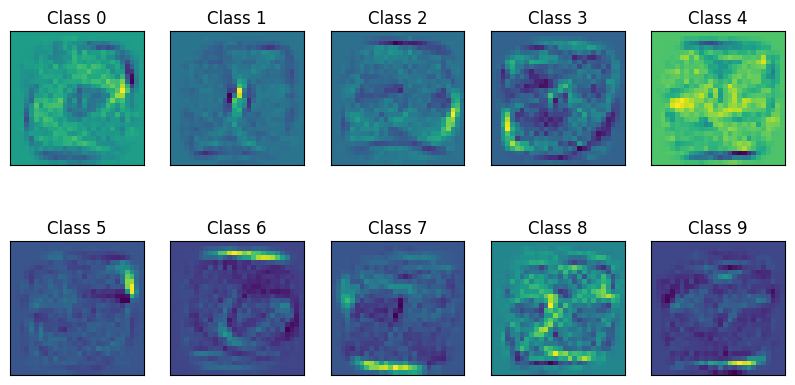

In [ ]:
# Only for the MNIST dataset
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W[1:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap='viridis')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

#### **To improve the visualization of the 10 vectors of weights W, the use of a divergent color map is indicated: the average value of the color map is a neutral color and the extreme values represent different colors. Using a divergent color map and a bilinear interpolation scheme (to facilitate the visualization of low-resolution images), the result of the visualization of the 10 vectors of weights W is illustrated in the following images.**

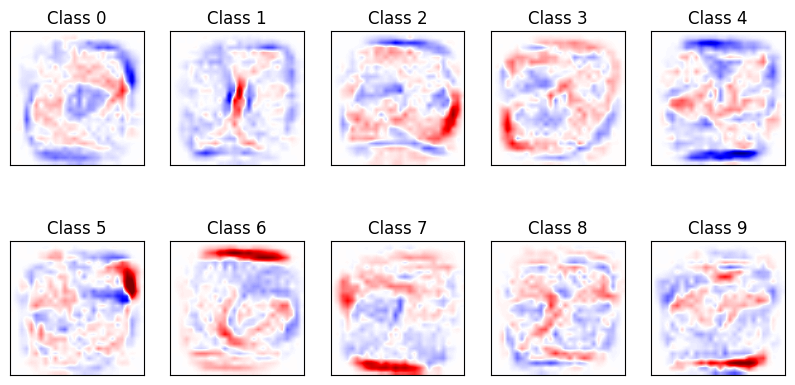

In [ ]:
# Only for the MNIST dataset
scale = np.abs(W).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W[1:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

<font color="green">
Atividade (c) <br>
Com base nesses dois resultados visuais acima, responda: Qual é a estratégia adotada pelo classificador linear para buscar máximo desempenho? <br>
</font>

Resposta: Considerando a representação na cor azul o apse negativo e o vermelho o apse positivo, o classificador coloca peso positivo nas regiões que ele indicam que pertencem a classe, e peso negativo nas regiões que garantem que não pertencem a classe. Com base no treinamento, o classificador aprende onde estão as partes mais importantes das classes que levam aos verdadeiros positivos e os verdadeiros negativos.

#### **Performance of the average 10 vectors of weights (here no bias is considered)**

In [ ]:
W1 = np.zeros((784, 10))
for i in range(10):
  aux = np.mean(Xp[y==i], axis=0)
  aux = aux.reshape(784)/255
  aux = aux-np.mean(aux)
  W1[:,i] = aux/np.sqrt(np.sum(np.square(aux)))
yt_estimate = np.matmul(Xta,W1)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
confusion_matrix_df = pd.DataFrame(confusion_matrix)
confusion_matrix_df

Performance on test set: 0.8208


,0,1,2,3,4,5,6,7,8,9
0,902,0,27,6,4,27,29,8,7,16
1,0,1074,51,5,10,37,14,51,21,17
2,6,9,776,25,3,9,16,26,11,6
3,3,4,43,851,0,137,1,0,91,12
4,0,0,27,1,793,20,18,16,12,80
5,33,4,0,28,1,564,22,0,29,11
6,25,4,31,8,24,29,850,1,17,3
7,1,0,15,14,1,11,0,849,10,29
8,10,40,56,52,19,34,8,22,738,24
9,0,0,6,20,127,24,0,55,38,811


#### **Visualization of the average 10 vectors of weights**

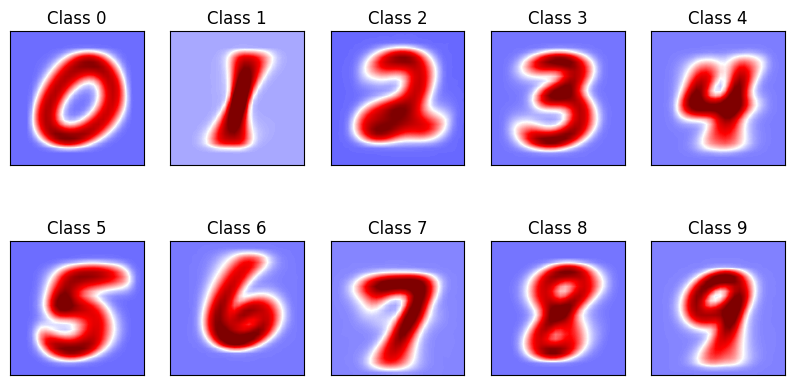

In [ ]:
# Only for the MNIST dataset
scale = np.abs(W1).max()
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    weight = W1[:,i].reshape([28,28])
    plt.title(f'Class {i}')
    plt.imshow(weight, cmap=plt.cm.seismic, vmin=-scale/2, vmax=scale/2, interpolation='bilinear')
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)

<font color="green">
Atividade (d) <br>
Com base na execução das duas células acima, responda: Por que motivo os vetores com a média das imagens por classe não levam a um classificador de máximo desempenho? Nota: A resposta não depende do fato do classificador aqui não adotar o bias em sua implementação. <br>
</font>

Resposta: Nesse caso, observa-se que a visualização do vetor de pesos leva a um desenho similar a sombra do número que a classe representa, ou seja, o classificador leva em consideração a busca na imagem dos pixels que compoem a classe, e somente. Diferente da situação anterior, onde ele ponderava regiões como muito positivas e muito negativas, que diferenciavam as classes uma das outras, agora ele busca encontrar o número exato da classe, e assim o classificador pode se confundir mais facilmente. Por exemplo, 5 e 3 apresentam uma sinueta muito parecida, logo a confusão entre eles aumenta significativamente.

Image no. 11


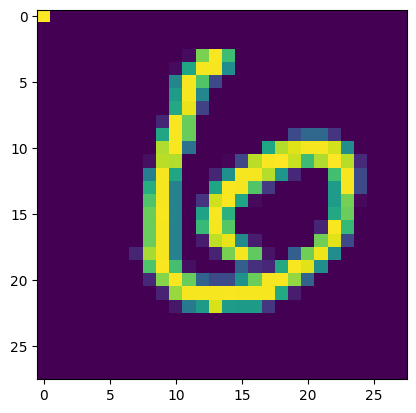

Real: 6
Predicted: 4
Rank of the correct answer: 7
Probabilities: [ 0.23968395  0.1638375   0.16938576  0.07338357  0.28722525 -0.19372314
  0.06647505 -0.06150803  0.17786047  0.0608264 ] 

Image no. 33


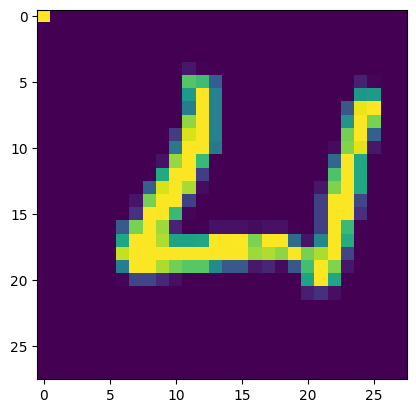

Real: 4
Predicted: 5
Rank of the correct answer: 4
Probabilities: [ 0.36107232 -0.07527714  0.1852699  -0.31393528  0.21104868  0.36850171
  0.22125884 -0.02607829  0.07080682 -0.03126825] 

Image no. 38


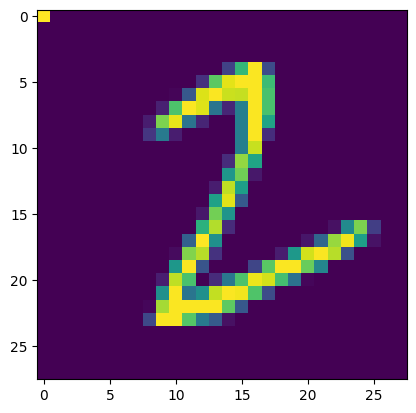

Real: 2
Predicted: 1
Rank of the correct answer: 5
Probabilities: [ 0.1877345   0.34592318  0.16146488  0.25708126 -0.27455816  0.08829136
  0.2011008  -0.03638731  0.11867159 -0.07704927] 

Image no. 43


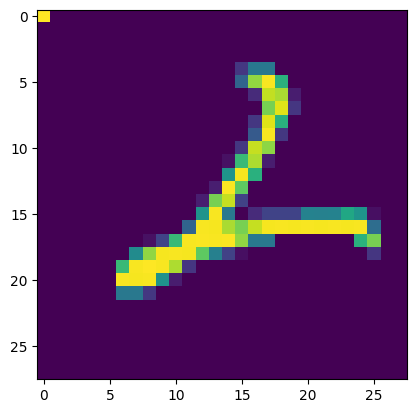

Real: 2
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.02846559  0.35666798  0.26717833  0.05816458  0.21640962  0.06027526
 -0.0252744  -0.02218041  0.11903957 -0.03489281] 

Image no. 45


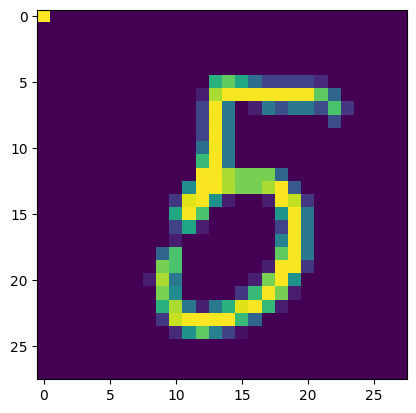

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 8.93871259e-02 -1.16753620e-01 -5.41333577e-02  3.78220838e-01
  5.37820354e-02  3.48763857e-01  1.80002065e-01 -7.77877729e-02
  1.75589797e-01 -3.18645308e-04] 

Image no. 46


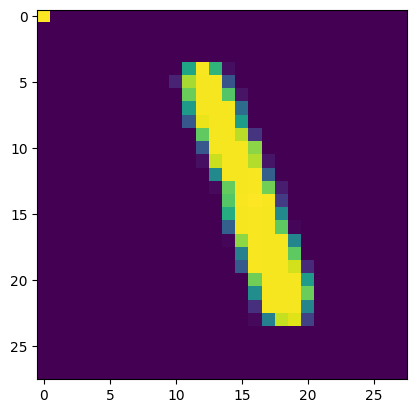

Real: 1
Predicted: 3
Rank of the correct answer: 2
Probabilities: [-0.28256204  0.31949064  0.14709106  0.34623534  0.09369361  0.19774237
  0.06299223  0.05034415 -0.00192237  0.06075564] 

Image no. 47


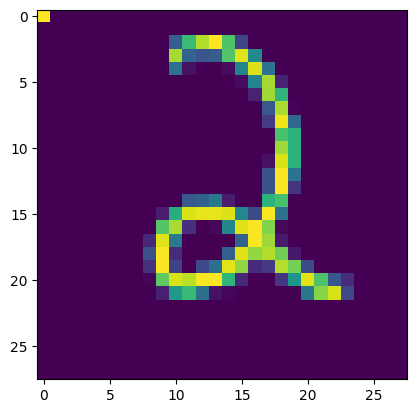

Real: 2
Predicted: 6
Rank of the correct answer: 2
Probabilities: [ 0.0032724   0.00234076  0.32792942  0.0420126  -0.05741162  0.11157388
  0.50554102  0.06851356 -0.07926298  0.05501806] 

Image no. 54


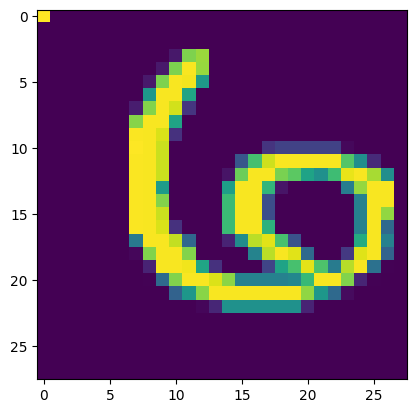

Real: 6
Predicted: 2
Rank of the correct answer: 2
Probabilities: [ 0.09521139  0.14906843  0.46426565 -0.05215426  0.1836218  -0.21549747
  0.44854261 -0.08261702  0.07233169 -0.05739499] 

Image no. 63


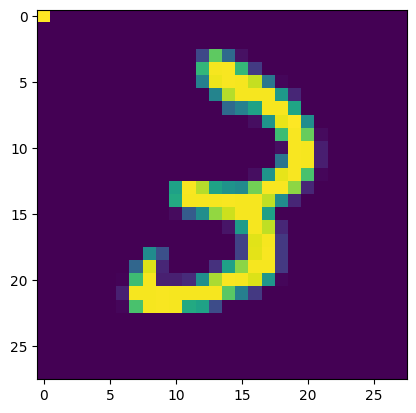

Real: 3
Predicted: 2
Rank of the correct answer: 3
Probabilities: [ 0.06492505  0.04843245  0.41496483  0.18379655  0.06838299 -0.02996691
 -0.05522448 -0.111105    0.12104704  0.28099354] 

Image no. 66


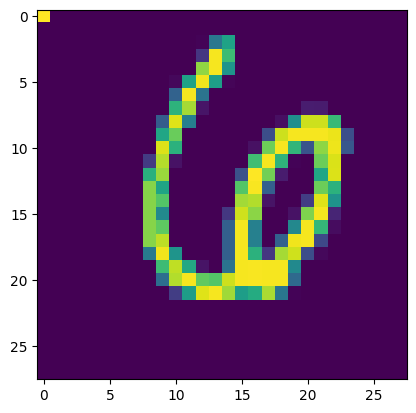

Real: 6
Predicted: 1
Rank of the correct answer: 4
Probabilities: [ 0.23301225  0.27879492  0.11456148  0.13008384  0.21814255 -0.09166969
  0.2076138   0.1306849  -0.08301246 -0.14791858] 

Image no. 80


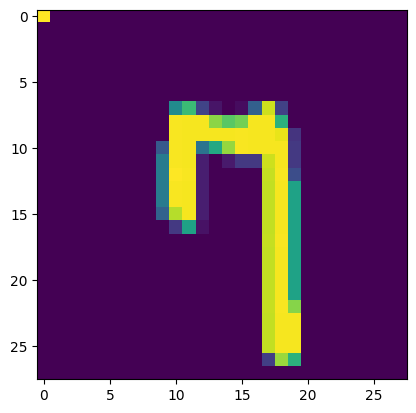

Real: 7
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.10242727 -0.13437316 -0.00078009  0.06620625  0.06939028  0.09339972
  0.00714764  0.44087853 -0.20315418  0.55659358] 

Image no. 92


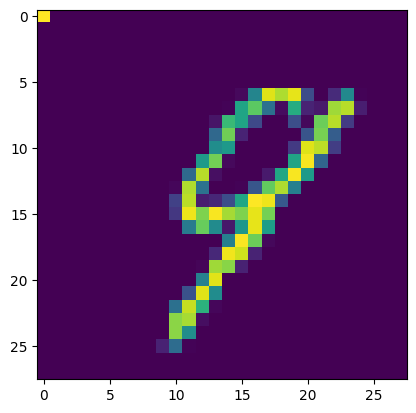

Real: 9
Predicted: 4
Rank of the correct answer: 2
Probabilities: [ 0.03067937  0.11839857  0.09046496 -0.03045852  0.27225592  0.06379201
  0.03914229  0.12115436  0.06968572  0.19338545] 

Image no. 97


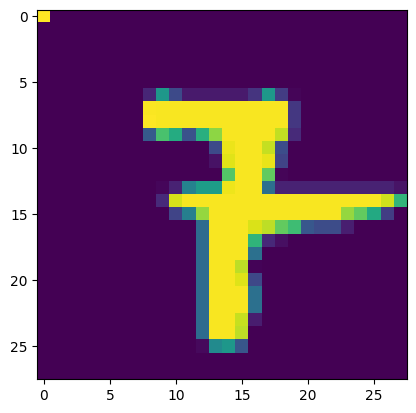

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.13274788  0.39969045 -0.13649541  0.2092232   0.14482242  0.00934051
  0.20673396  0.37424789 -0.01889353 -0.03015332] 

Image no. 111


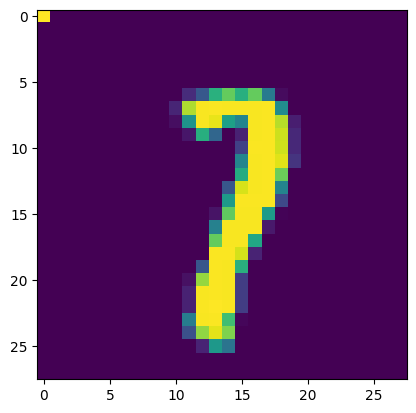

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [-0.06275348  0.51471107  0.09183385  0.15997298 -0.08697901 -0.00478892
 -0.03657216  0.22079173  0.02544949  0.17830922] 

Image no. 120


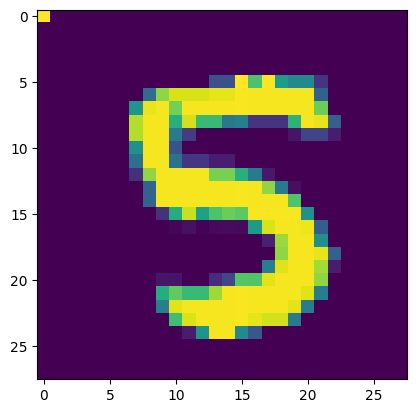

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.07746575 -0.09636989 -0.15461861  0.42496414  0.13372231  0.42150569
  0.17683553 -0.16622586  0.22931556 -0.03727908] 

Image no. 124


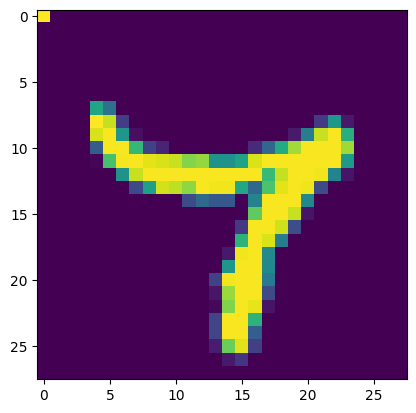

Real: 7
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.22094151  0.01879508 -0.24123673  0.16976103  0.40187525 -0.07883298
  0.06351102  0.33602757  0.28859762  0.25701807] 

Image no. 149


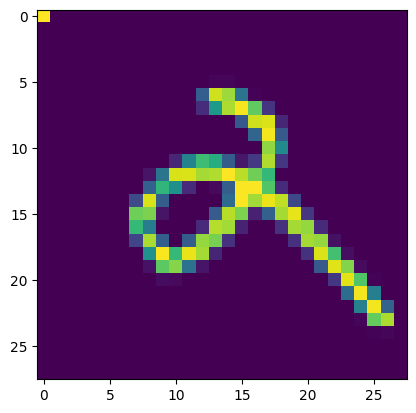

Real: 2
Predicted: 1
Rank of the correct answer: 4
Probabilities: [-0.01239193  0.29646092  0.11239377  0.03645842  0.2233693   0.06392019
  0.04261449 -0.14742995  0.08971675  0.26464061] 

Image no. 150


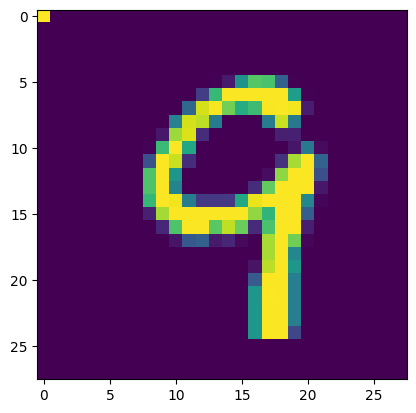

Real: 9
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.00338235  0.05496663  0.05138567  0.06562654  0.38526114  0.03415895
  0.05438074 -0.09680449  0.0603984   0.38373505] 

Image no. 151


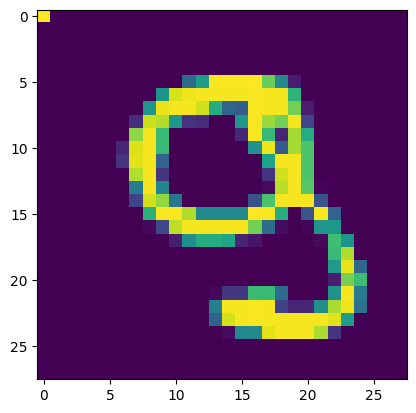

Real: 9
Predicted: 8
Rank of the correct answer: 3
Probabilities: [ 0.17523389  0.04156108  0.11437912  0.04176465  0.26879127 -0.07481365
 -0.19272467  0.09366554  0.31015485  0.22989025] 

Image no. 167


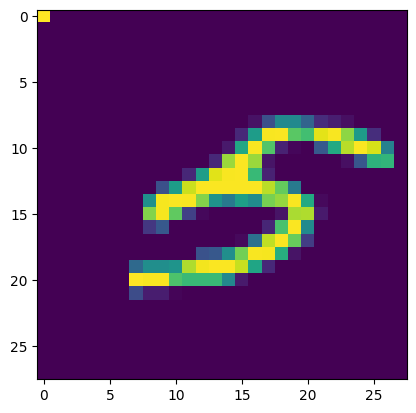

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.02710122  0.21031651  0.03199886  0.31050477  0.23002672  0.30744006
 -0.01988109 -0.02126901 -0.01472347 -0.08352776] 

Image no. 185


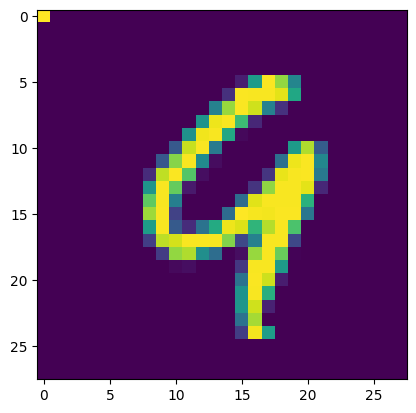

Real: 9
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.03914561  0.0400581   0.05325651 -0.0854119   0.39614302 -0.13450325
  0.1071835   0.04548757  0.23705902  0.36809801] 

Image no. 187


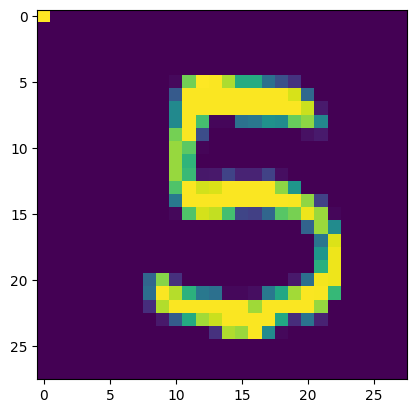

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.11692105 -0.05033748  0.13347974  0.3801103  -0.04820081  0.37321068
 -0.06850908 -0.19545458  0.13950059  0.20710216] 

Image no. 195


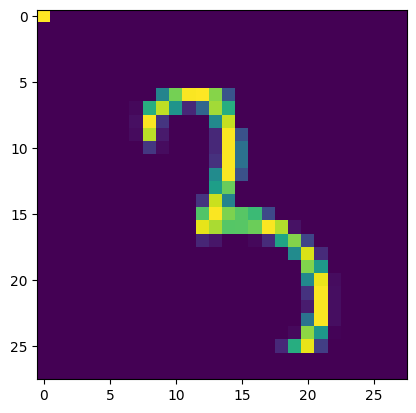

Real: 3
Predicted: 9
Rank of the correct answer: 3
Probabilities: [-0.10928572  0.00602348  0.06891907  0.13848762  0.06298108  0.22707019
  0.0911356   0.09971225  0.11902596  0.24393934] 



In [ ]:
def find_pos(item, lst):
    pos = [i for (z, i) in zip(lst, range(len(lst))) if item == z]
    return pos

def display_sample(sample: np.ndarray):

    sample = np.array(sample, dtype='float')
    pixels = np.zeros((28,28))

    for i in range(28):
        for j in range(28):
            pixels[i,j] = sample[i * 28 + j]

    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='viridis')
    plt.show()

yt_estimate = np.matmul(Xt,W)
for i in range(200):
    if yyt[i][np.argmax(yt_estimate[i,:])] != 1:
      print(f"Image no. {i}")
      display_sample(Xt[i])
      print(f"Real: {np.argmax(yyt[i,:])}")
      print(f"Predicted: {np.argmax(yt_estimate[i,:])}")
      value = yt_estimate[i,np.argmax(yyt[i,:])]
      v_sorted = np.sort(yt_estimate[i,:])
      value_index = find_pos(value,v_sorted)
      print(f"Rank of the correct answer: {10 - value_index[0]}")
      print(f"Probabilities: {yt_estimate[i,:]} \n")

<font color="green">
Atividade (e) <br>
Informe o que faz esta última célula executável do notebook e analise os resultados obtidos logo acima. <br>
</font>

Resposta: Para as amostras que não tiveram sucesso, ele verifica qual o rótulo verdadeiro, o rótulo estimado, e dentre as probabilidades estimadas daquela amostra pertencer a cada classe, qual é o rank na escala decrescente de probabilidades da classe real. Observa-se nos resultados que muitas vezes rotações na amostra do dígito escrito, ou irregularidades na sua escrita fazem com que o classificador não consiga identificar sua classe, mesmo sendo algo feito facilmente por olhos humanos, e que pode ser feito por métodos mais complexos de classificação.